In [1]:

import numpy as np 
import pandas as pd 

df=pd.read_csv('./heart_2020_cleaned.csv')
df_org = df.copy() 
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [2]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [3]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype(int)
df['AgeCategory']

0         57
1         80
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    80
Name: AgeCategory, Length: 319795, dtype: int64

In [5]:
df.describe()[1:][list(numeric_features)].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


<hr>

In [6]:
columns_df = list(df.columns.values)
from sklearn.preprocessing import LabelEncoder

cat_cols = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
                "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity",
                "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]
for cat_col in cat_cols:
    dummy_col = pd.get_dummies(df[cat_col], prefix=cat_col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[cat_col]

for col in ['HeartDisease']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,False,True,True,False,True,...,False,False,False,True,False,True,True,False,False,True
1,0,20.34,0.0,0.0,7.0,True,False,True,False,False,...,False,False,False,True,True,False,True,False,True,False
2,0,26.58,20.0,30.0,8.0,False,True,True,False,True,...,True,False,False,False,False,True,True,False,True,False
3,0,24.21,0.0,0.0,6.0,True,False,True,False,True,...,False,True,False,False,True,False,True,False,False,True
4,0,23.71,28.0,0.0,8.0,True,False,True,False,True,...,False,False,False,True,True,False,True,False,True,False


In [7]:
df_enc_mix = df_org.copy()

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = df_enc_mix.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df_enc_mix[col].unique()) <= 2:
        df_enc_mix[col] = le.fit_transform(df_enc_mix[col])
    else:
        df_enc_mix = pd.get_dummies(df_enc_mix, columns=[col])

df_enc_mix.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,True,False,False,True,False,False,False,False,False,True
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,True,True,False,False,False,False,False,False,False,True
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,True,False,False,True,False,False,True,False,False,False
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,True,True,False,False,False,False,False,True,False,False
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,True,True,False,False,False,False,False,False,False,True


In [9]:
for column in list(df.columns.values):
    print(column, ':', str(df[column].unique()))

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Smoking_No : [False  True]
Smoking_Yes : [ True False]
AlcoholDrinking_No : [ True False]
AlcoholDrinking_Yes : [False  True]
Stroke_No : [ True False]
Stroke_Yes : [False  True]
DiffWalking_No : [ True False]
DiffWalking_Yes : [False  True]
Sex_Female : [ True False]
Sex_Male : [False  True]
AgeCategory_21 : [False  True]
AgeCategory_27 : [False  True]
AgeCategory_32 : [False  True]
AgeCategory_37 : [False  True]
AgeCategory_42 : [False  True]
AgeCategory_47 : [False  True]
AgeCategory_52 : [False  True]
AgeCategory_57 : [ True

In [10]:
for column in list(df_enc_mix.columns.values):
    print(column, ':', str(df_enc_mix[column].unique()))

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : [0 1]
Sex : [0 1]
PhysicalActivity : [1 0]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]
AgeCategory_18-24 : [False  True]
AgeCategory_25-29 : [False  True]
AgeCategory_30-34 : [False  True]
AgeCategory_35-39 : [False  True]
AgeCategory_40-44 : [False  True]
AgeCategory_45-49 : [False  True]
AgeCategory_50-54 : [False  True]
AgeCategory_55-59 : [ True False]
AgeCategory_60-64 : [False  True]
AgeCategory_65-69 : [False  True]
AgeCategory_70-74 : [False

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_data, test_data = train_test_split(df, train_size=0.80) 
train_data.shape, test_data.shape

((255836, 51), (63959, 51))

In [13]:
train_data_label, test_data_label = train_test_split(df_enc_mix, train_size=0.80)
train_data_label.shape, test_data_label.shape

((255836, 42), (63959, 42))

In [14]:
X_train= train_data.drop('HeartDisease', axis=1)
y_train= train_data['HeartDisease']
print(X_train.shape, y_train.shape)

X_test= test_data.drop('HeartDisease', axis=1)
y_test= test_data['HeartDisease']
print(X_test.shape, y_test.shape)

(255836, 50) (255836,)
(63959, 50) (63959,)


In [15]:
X_train_new= train_data_label.drop('HeartDisease', axis=1)
y_train_new= train_data_label['HeartDisease']
print(X_train_new.shape, y_train_new.shape)

X_test_new= test_data_label.drop('HeartDisease', axis=1)
y_test_new= test_data_label['HeartDisease']
print(X_test_new.shape, y_test_new.shape)

(255836, 41) (255836,)
(63959, 41) (63959,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train_new=sc.fit_transform(X_train_new)
X_test_new=sc.transform(X_test_new)

In [17]:
X_train

array([[-5.14980396e-01, -1.73063320e-01, -4.90461609e-01, ...,
        -1.96229943e-01,  3.20822046e-01, -3.20822046e-01],
       [ 9.24724207e-01, -4.24516940e-01, -4.90461609e-01, ...,
        -1.96229943e-01,  3.20822046e-01, -3.20822046e-01],
       [-8.29669927e-01, -4.24516940e-01, -4.90461609e-01, ...,
        -1.96229943e-01,  3.20822046e-01, -3.20822046e-01],
       ...,
       [-3.90678031e-01, -4.24516940e-01, -4.90461609e-01, ...,
        -1.96229943e-01,  3.20822046e-01, -3.20822046e-01],
       [ 1.11043450e-03,  2.09001926e+00,  2.64732586e+00, ...,
        -1.96229943e-01,  3.20822046e-01, -3.20822046e-01],
       [-6.67604818e-01, -4.24516940e-01, -4.90461609e-01, ...,
        -1.96229943e-01,  3.20822046e-01, -3.20822046e-01]])

In [18]:
X_train_new

array([[-0.79069828,  1.19332341, -0.27032308, ...,  1.55907815,
        -0.19079485, -0.74342191],
       [ 0.47196222, -0.83799579, -0.27032308, ..., -0.64140467,
        -0.19079485,  1.34513119],
       [-0.85524826, -0.83799579, -0.27032308, ..., -0.64140467,
        -0.19079485, -0.74342191],
       ...,
       [-0.83635558, -0.83799579, -0.27032308, ..., -0.64140467,
        -0.19079485,  1.34513119],
       [ 0.86870841,  1.19332341, -0.27032308, ..., -0.64140467,
        -0.19079485,  1.34513119],
       [-0.05388392, -0.83799579,  3.69927717, ...,  1.55907815,
        -0.19079485, -0.74342191]])

In [19]:
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [20]:
df_enc_mix['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
from imblearn.under_sampling import NearMiss

In [23]:

from collections import Counter

In [24]:
smote = SMOTE(sampling_strategy='minority')
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

print('Original: {}'.format(Counter(y_train))) 
print('   SMOTE: {}'.format(Counter(y_train_smote))) 

Original: Counter({0: 233946, 1: 21890})
   SMOTE: Counter({0: 233946, 1: 233946})


In [25]:
X_train_smote_new , y_train_smote_new = smote.fit_resample(X_train_new,y_train_new)

print('Original: {}'.format(Counter(y_train_new)))
print('  SMOTE2: {}'.format(Counter(y_train_smote_new)))

Original: Counter({0: 233965, 1: 21871})
  SMOTE2: Counter({0: 233965, 1: 233965})


In [26]:
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train, y_train)

print('Original: {}'.format(Counter(y_train))) 
print('NearMiss: {}'.format(Counter(y_train_nearmiss))) 

Original: Counter({0: 233946, 1: 21890})
NearMiss: Counter({0: 21890, 1: 21890})


In [27]:
X_train_nearmiss_new, y_train_nearmiss_new = nearmiss.fit_resample(X_train_new, y_train_new)

print(' Original: {}'.format(Counter(y_train_new)))
print('NearMiss2: {}'.format(Counter(y_train_nearmiss_new)))

 Original: Counter({0: 233965, 1: 21871})
NearMiss2: Counter({0: 21871, 1: 21871})


In [28]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None,shuffle=False) 

In [29]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [30]:

def dt_model():
    model_dt = DecisionTreeClassifier()
    params_dt = {"criterion":['gini','entropy'], "max_depth": [100], "random_state": [1024]}
    model_dt_cv = GridSearchCV( model_dt, 
                                param_grid = params_dt, 
                                cv = cv, 
                                n_jobs = -1, 
                                verbose = 1 )
    return model_dt_cv

In [31]:
model_dt_cv_smote = dt_model()
model_dt_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_dt_cv_smote.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [32]:
model_dt_cv_smote_new = dt_model()
model_dt_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_dt_cv_smote_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE2:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [33]:
model_dt_cv_nearmiss = dt_model()
model_dt_cv_nearmiss.fit(X_train_nearmiss ,y_train_nearmiss)
print("Best Hyper Parameters for NearMiss: ", model_dt_cv_nearmiss.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [34]:
model_dt_cv_nearmiss_new = dt_model()
model_dt_cv_nearmiss_new.fit(X_train_nearmiss_new ,y_train_nearmiss_new)
print("Best Hyper Parameters for NearMiss2: ", model_dt_cv_nearmiss_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for NearMiss2:  {'criterion': 'gini', 'max_depth': 100, 'random_state': 1024}


In [35]:
y_pred_dt_smote = model_dt_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_dt_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     58476
           1       0.21      0.30      0.25      5483

    accuracy                           0.85     63959
   macro avg       0.57      0.60      0.58     63959
weighted avg       0.87      0.85      0.86     63959



In [36]:
y_pred_dt_smote_new = model_dt_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_dt_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     58457
           1       0.21      0.28      0.24      5502

    accuracy                           0.85     63959
   macro avg       0.57      0.59      0.58     63959
weighted avg       0.87      0.85      0.86     63959



In [37]:
y_pred_dt_nearmiss = model_dt_cv_nearmiss.predict(X_test)
print("Classification Report for NearMiss: \n", classification_report(y_test, y_pred_dt_nearmiss))

Classification Report for NearMiss: 
               precision    recall  f1-score   support

           0       0.92      0.41      0.56     58476
           1       0.09      0.61      0.15      5483

    accuracy                           0.43     63959
   macro avg       0.50      0.51      0.36     63959
weighted avg       0.85      0.43      0.53     63959



In [38]:
y_pred_dt_nearmiss_new = model_dt_cv_nearmiss_new.predict(X_test_new)
print("Classification Report for NearMiss2: \n", classification_report(y_test_new, y_pred_dt_nearmiss_new))

Classification Report for NearMiss2: 
               precision    recall  f1-score   support

           0       0.92      0.39      0.55     58457
           1       0.09      0.62      0.15      5502

    accuracy                           0.41     63959
   macro avg       0.50      0.51      0.35     63959
weighted avg       0.84      0.41      0.52     63959



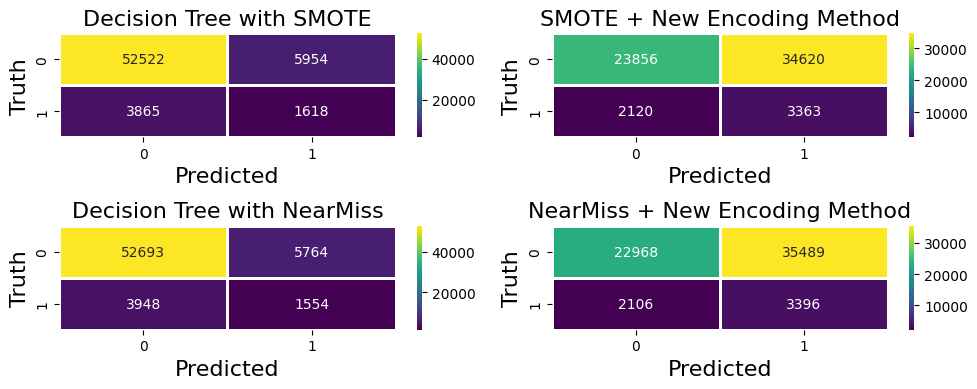

In [39]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_dt_smote = confusion_matrix(y_test,y_pred_dt_smote) 
cm_dt_nearmiss = confusion_matrix(y_test,y_pred_dt_nearmiss) 
cm_dt_smote_new = confusion_matrix(y_test_new,y_pred_dt_smote_new) 
cm_dt_nearmiss_new = confusion_matrix(y_test_new,y_pred_dt_nearmiss_new) 

def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap='viridis'):
    sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted',fontsize=16)
    ax.set_ylabel('Truth',fontsize=16)
    ax.set_title(title,fontsize=16)

fig, axs = plt.subplots(2,2, figsize=(10,4))

plot_confusion_matrix(axs[0,0], cm_dt_smote, title='Decision Tree with SMOTE')
plot_confusion_matrix(axs[0,1], cm_dt_nearmiss, title='SMOTE + New Encoding Method')
plot_confusion_matrix(axs[1,0], cm_dt_smote_new, title='Decision Tree with NearMiss')
plot_confusion_matrix(axs[1,1], cm_dt_nearmiss_new, title='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(ax, model_cv, X_test, y_test, label): 
    y_score_model = model_cv.predict_proba(X_test) 
    yes_probs = y_score_model[:,1] 

    fpr_model, tpr_model, _ = roc_curve(y_test, yes_probs)

    auc_model = auc(fpr_model, tpr_model)

    ax.plot([0,1],[0,1], linestyle='--', label='No Skill')

    label = f'{label} (auc={auc_model:.3f})'
    ax.plot(fpr_model, tpr_model, marker='_', label=label, color='red')

    ax.set_xlabel("False Positive Rate")

    ax.set_ylabel("True Positive Rate")

    ax.legend()


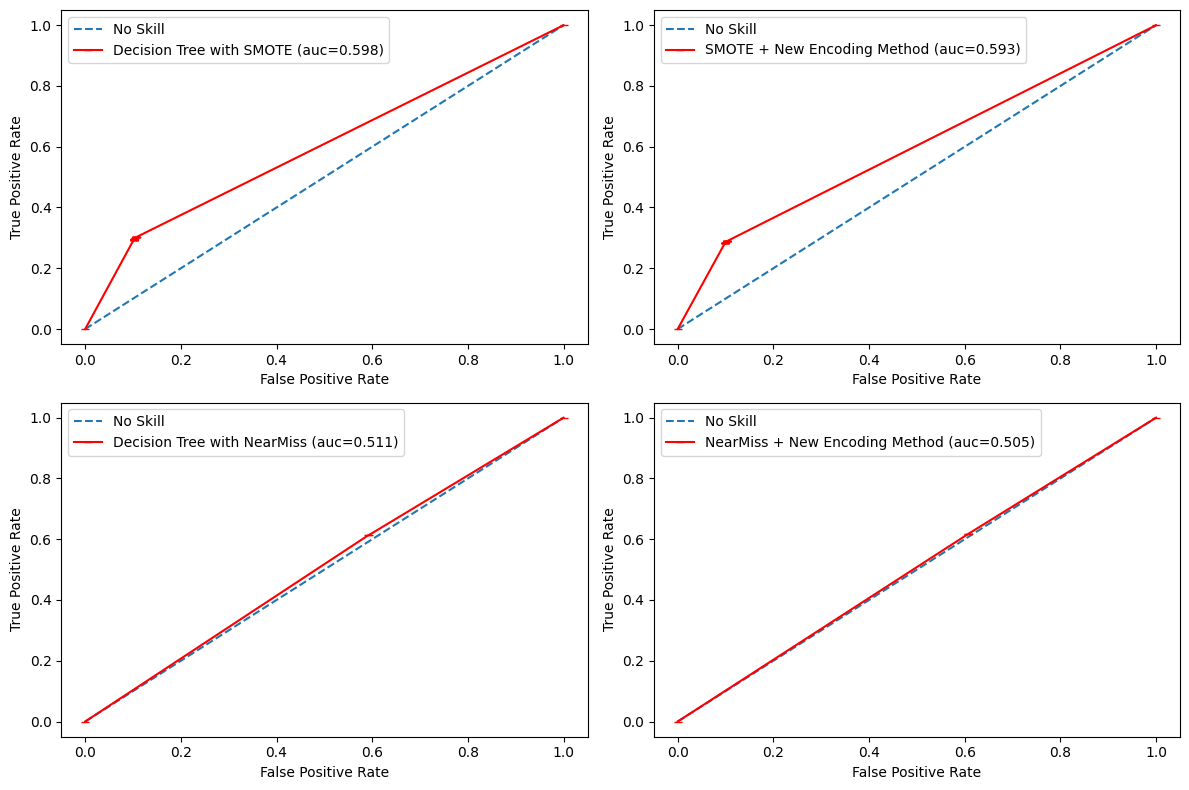

In [41]:


fig, axs = plt.subplots(2,2, figsize=(12,8))

plot_roc_auc(axs[0,0], model_dt_cv_smote, X_test, y_test, label='Decision Tree with SMOTE')
plot_roc_auc(axs[0,1], model_dt_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plot_roc_auc(axs[1,0], model_dt_cv_nearmiss, X_test, y_test, label='Decision Tree with NearMiss')
plot_roc_auc(axs[1,1], model_dt_cv_nearmiss_new, X_test_new, y_test_new, label='NearMiss + New Encoding Method')

plt.tight_layout()
plt.show()